<a href="https://colab.research.google.com/github/TylerRobichaux/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import std
from numpy import mean
from numpy import var


a = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

a.sum() / 7

#Mean

3052.714285714286

In [50]:
var = (((a - 3052.714285714286)**2).sum()) / 6
var
#varience

214387.90476190473

In [51]:
np.var(a, ddof = 1)


214387.90476190473

In [5]:
np.sqrt(var)
#std

463.0204150595357

In [49]:
np.std(a, ddof = 1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [7]:
cust = [127, 80, 105, 92, 120, 115, 93]
sale = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
df = pd.DataFrame({'cust': cust, 'sale': sale})

df.cov()

,cust,sale
cust,290.952381,7604.357143
sale,7604.357143,214387.904762


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [8]:
df['sale'].var()

214387.90476190473

In [9]:
df['cust'].var()

290.95238095238096

In [10]:
df['cust'].std()

17.057326313123664

In [11]:
df['sale'].std()

463.0204150595357

In [12]:
df.corr()

,cust,sale
cust,1.000000,0.962834
sale,0.962834,1.000000


In [13]:
df.cov()

,cust,sale
cust,290.952381,7604.357143
sale,7604.357143,214387.904762


In [0]:
def mean(data, ddof=0):
  data = np.array(data)
  return sum(data)/(len(data)-ddof)

In [15]:
def variance(data):
  data = np.array(data)
  variance = mean((data - mean(data))**2, ddof=1)
  return variance

variance(df['sale'])

214387.90476190473

In [16]:
def std_dev(data):
  data = np.array(data)
  std = np.sqrt(variance(data))
  return std

std_dev(df['sale'])

463.0204150595357

In [17]:
covariance = df.cov()['sale']['cust']

covariance

7604.357142857142

In [18]:
def correlation(covariance, var1, var2):
  var1 = np.array(var1)
  var2 = np.array(var2)
  std1 = std_dev(var1)
  std2 = std_dev(var2)
  r = covariance / (std1*std2)
  return r

correlation(covariance, df['sale'], df['cust'])
#full disclosure, the above is mostly copy pasted from Q&A.
#My issue was i was trying to us numpy .cov() the same as you would use pandas .cov()
#The cell above shows the output of a pandas .cov() the output below shows a numpy .cov()
#I couldnt figure out how to get the correct output with numpy so i surrendered.
#I could get the std, mean, and var with numpy. I jsut cant get the cov
#I am done for tonight, Ill see if i can get myself to get it to work with numpy in the morning

0.9628339778148909

In [19]:
np.cov(cust, sale)

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

In [40]:
np.cov(cust,sale, ddof=1)
#I see in the documentation that numpy .cov gives a matrix, I cant find a numpy fuction that returns a single number for cov to save my life


# #YES! I figured it out. I fianlly stumbled upon a astack overflow question. numpy .cov returns a matrix ov covarence equal to 
# (a,a)(a,b)
# (a,b) (b,b)
#So the number I am looking for is the top right and bottom left.
#It should really explain that in the documentation....

array([[   290.95238095,   7604.35714286],
       [  7604.35714286, 214387.9047619 ]])

In [52]:
7604.35714286 / (463.0204150595357 * 17.057326313123664)
# :D

0.9628339778152527

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-2.0, 5.0)

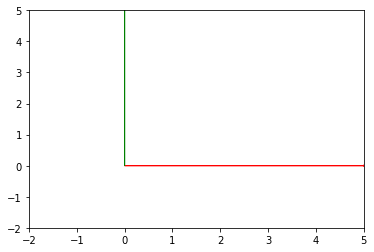

In [22]:
plt.arrow(0,0, 5, 0,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, 0, 7,head_width=.05, head_length=0.05, color ='green')

plt.xlim(-2, 5)          
plt.ylim(-2 ,5)
#perpendicualr

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [23]:
a = np.array([[-5, 3, 7]]).T
b = np.array([[6, -8, 2]])

np.dot(a,b)
#they are not orthogonal. the dot product !=0

array([[-30,  40, -10],
       [ 18, -24,   6],
       [ 42, -56,  14]])

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [24]:
c = [2, -15, 6, 20]
             
             
math.sqrt(np.square(c).sum())

25.787593916455254

In [25]:
np.dot(c,c)

665

In [26]:
c = np.array(c)
c

array([  2, -15,   6,  20])

In [27]:
c.T * c

array([  4, 225,  36, 400])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:



 \begin{align}
  = 2\begin{bmatrix} 7 \\ 12 \end{bmatrix} + \ 3 \begin{bmatrix} 2 \\ 11 \\  -8 \end{bmatrix}
\end{align}

Your text here

oh oops, I saw this after. 

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [28]:
f = np.array([4, 12, 11, 9, 2])

f / (((f**2).sum())**0.5)

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(-10.0, 10.0)

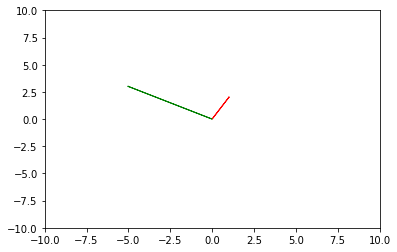

In [29]:
plt.arrow(0,0, 1, 2,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, -5, 3,head_width=.05, head_length=0.05, color ='green')
plt.xlim(-10, 10)          
plt.ylim(-10 ,10)

#independant

(0.0, 10.0)

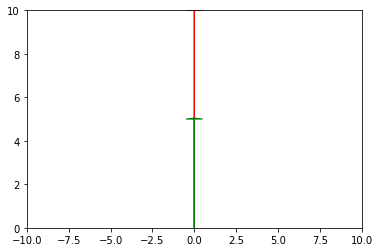

In [30]:
plt.arrow(0,0, 0, 10,head_width=1, head_length=0.05, color ='red')
plt.arrow(0,0, 0, 5,head_width=1, head_length=0.05, color ='green')
plt.xlim(-10, 10)          
plt.ylim(0 ,10)

#dependant

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [31]:
gh = np.array([[1,2], [4, 8]])
gh

array([[1, 2],
       [4, 8]])

In [32]:


np.linalg.matrix_rank(gh)
#These vectors span 1d space

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [33]:
lmn = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
lmn

array([[ 1,  2,  3],
       [-1,  0,  7],
       [ 4,  8,  2]])

In [34]:
np.linalg.matrix_rank(lmn)
#these vectors span 3d space

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(-10.0, 10.0)

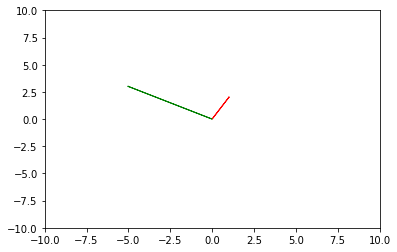

In [35]:
plt.arrow(0,0, 1, 2,head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, -5, 3,head_width=.05, head_length=0.05, color ='green')
plt.xlim(-10, 10)          
plt.ylim(-10 ,10)

#Its jsut asking me to grapg 2 vectors that span 2d space right?

## 6.2 What does it mean to form a basis?

A group of linearly independant vectors that span a dimension of space. 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
#the rank of P is 3

## 7.2 What does the rank of a matrix tell us?

In [0]:
#It tells us the number of dimensions that is spanned by the vector(s)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

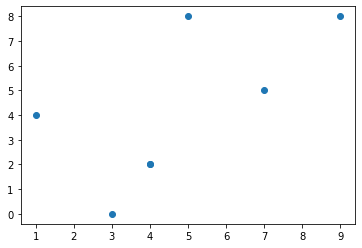

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()